# Reto Python 2: Un modelo generalizado de Urnas
## Santiago Arroyo Lozano

**La composición de la urna**
Consideremos una urna compuesta por $N$ bolas de $k$ colores distintos, con $N$ y $k$ enteros
tales que $1 \leq k \leq N$. Sea $1 \leq n_{i} \leq N$ el número de bolas del color $i–$ésimo dentro de la
urna, para cada $i = 1, 2, ..., k,$ con $n_1 + n_2 + \dots + n_k = N$.

## El experimento
Se extrae una muestra sin reemplazo de tamano $m$ de la urna, con $1 \leq m \leq N$.

## Los eventos
Para cada $i = 1, 2, ..., k,$ sea $0 \leq c_i \leq n_i$, y sea $c = (c1, c2, ..., c_k)$. Denotamos como $E_c$ al evento
*“el número de bolas extraídas del color $i$– ́esimo es $c_i$, para cada $i = 1, ..., k$”*.

Sea $\mathcal{E}$ la familia de eventos $E_c$.

## El Reto
Escribe un programa en Python tal que compruebe el **Principio de regularidad de las
Frecuencias Relativas** para cada uno de los eventos Ec, esto es, escribe un programa
que haga lo siguiente:
1. Solicite al usuario ingresar el tamaño de la urna $N$.
2. Solicite al usuario ingresar el número de colores distintos $k$ y el número de bolas de cada color.
3. Solicite al usuario ingresar el tamaño de la muestra sin reemplazo $m$.
4. Solicite al usuario ingresar el número de repeticiones $r$.
5. Arroje un gráfico de barras de las frecuencias relativas de los eventos $E_c$.
6. Arroje un gráfico de las probabilidades de los evento $E_c$.

**OBS:** El programa deber ser capaz de señalar al usuario si comete errores, e insistir en
que se ingresen valores correctos.

In [59]:
# Definimos la función que llamará siempre al experimento
import random
from collections import defaultdict

def experimento(k,m,r):
    n = 0
    F=defaultdict(float)
    #Definimos la urna U
    while n<r:      
        U=[]
        # Será una lista
        for i in range(k):
            for j in range(c[i]):
                U.append("C" + str(i+1))
        muestras = []
        # Seleccionamos nuestras m muestras sin reemplazo
        for i in range(m):
            b = random.choice(U)
            muestras.append(b)
            U.pop(U.index(b))
        S=tuple(sorted(muestras))
        F[S]+=1/r
        n+=1
    F = sorted(F.items(), key=lambda x: x[1])
    return F

## Nota
Los números denotan colores, Debido a que el usuario no introduce los nombres de los colores estos los llamaremos por el número en el orden en el que fueron añadidos (Color 1 es C1, Color 2 es C2, Color 3 es C3, etc...)

In [86]:
#Iniciamos! 
bandera = True
N = int(input("Por favor introduce el tamaño de la urna: "))

#Le pedimos al usuario el número de colores y revisamos que todo esté bien
while bandera:
    k = int(input("Por favor introduce el número de colores distintos: "))
    if k > N:
        print("error! valor introducido muy grande")
    else:
        break
# Pedimos el número de bolas por cada color y revisamos
c = []
temp = 0
for i in range(k): 
    while bandera:
        x = (int(input("Por favor introduce el número de bolas de color " + str(i+1) + " : ")))            
        if x >= N or (temp+x) > N:
            print("error! valor introducido muy grande, quedan", (N-temp), " bolas por añadir")
        else:
            temp += x
            c.append(x)
            break

# Pedimos muestra y revisamos
while bandera:
    m = int(input("Por favor introduce el tamaño de la muestra sin reemplazo: "))
    if m > N:
        print("error! valor introducido muy grande")
    else:
        break
# repeticiones
r = int(input("Por favor introduce el número de repeticiones: "))

resultado = experimento(k,m,r)
print("\nLa frecuencia relativa con la que sale cada evento es:")
print(resultado)

Por favor introduce el tamaño de la urna: 25
Por favor introduce el número de colores distintos: 5
Por favor introduce el número de bolas de color 1 : 5
Por favor introduce el número de bolas de color 2 : 5
Por favor introduce el número de bolas de color 3 : 5
Por favor introduce el número de bolas de color 4 : 5
Por favor introduce el número de bolas de color 5 : 5
Por favor introduce el tamaño de la muestra sin reemplazo: 2
Por favor introduce el número de repeticiones: 10000

La frecuencia relativa con la que sale cada evento es:
[(('C2', 'C2'), 0.03189999999999989), (('C1', 'C1'), 0.03259999999999991), (('C3', 'C3'), 0.03379999999999994), (('C4', 'C4'), 0.034299999999999956), (('C5', 'C5'), 0.03660000000000002), (('C1', 'C3'), 0.07990000000000126), (('C1', 'C4'), 0.08020000000000127), (('C3', 'C5'), 0.0813000000000013), (('C1', 'C2'), 0.08210000000000132), (('C2', 'C3'), 0.08240000000000133), (('C2', 'C5'), 0.08300000000000135), (('C2', 'C4'), 0.08340000000000136), (('C1', 'C5'), 0

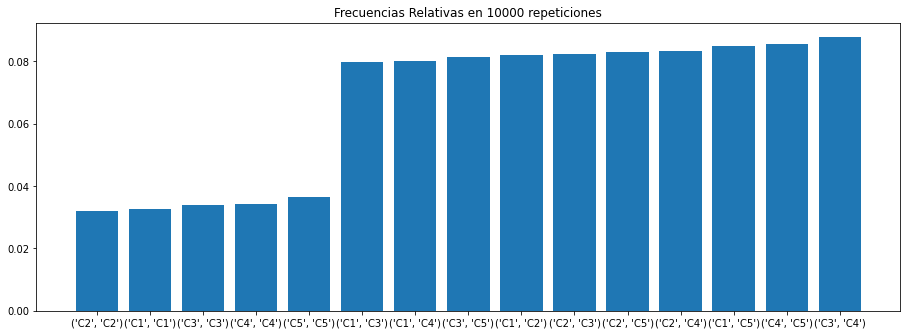

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
res = [str(i) for i,j in resultado]
frecuencia = [j for i,j in resultado]
ax.bar(res,frecuencia)
plt.title("Frecuencias Relativas en "+str(r)+" repeticiones")
plt.show()

Calculemos ahora la probabilidad por cada color y grafiquemos

In [88]:
import matplotlib.pyplot as plt

# Calculemos
probabilidades = defaultdict(float)
for i in range(k):
    probabilidades["C"+str(i+1)] = (c[i])/N
probabilidades    

defaultdict(float, {'C1': 0.2, 'C2': 0.2, 'C3': 0.2, 'C4': 0.2, 'C5': 0.2})

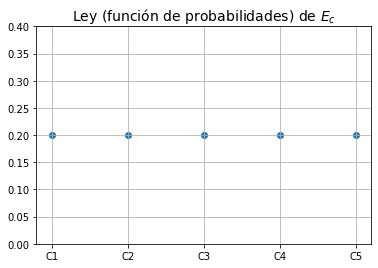

In [91]:
plt.scatter(x=probabilidades.keys(), y=probabilidades.values())
plt.ylim(0,.4)
plt.grid()
plt.title("Ley (función de probabilidades) de $E_c$",fontsize=14)
plt.show()